In [51]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import networkx as nx
import os
home_dir = os.path.expanduser("~")

In [5]:
df = pd.read_csv(home_dir + '/Box/CogNeuroLab/Aging Decision Making R01/Data/graph_metrics.csv')

In [6]:
df[0:5]

,record_id,Group,age,wb_clustering_x,wb_efficiency_x,wb_modularity_x,wb_participation_x,wb_betweenness_x,dmn_clustering_x,dmn_efficiency_x,dmn_modularity_x,dmn_participation_x,dmn_betweenness_x,fpn_clustering_x,fpn_efficiency_x,fpn_modularity_x,fpn_participation_x,fpn_betweenness_x
0,30004,Young Adults,27.0,0.191431,3.058174,0.464703,0.552392,469.989,0.275771,3.135394,0.302638,0.510629,416.167033,0.236354,2.595029,0.256461,0.603365,380.746154
1,30008,Young Adults,18.0,0.232896,3.300609,0.331669,0.503742,614.720,0.288837,3.362134,0.424081,0.409289,892.606593,0.247525,2.821406,0.454936,0.532557,652.846154
2,30008,Young Adults,18.0,0.232896,3.300609,0.331669,0.503742,614.720,0.288837,3.362134,0.424081,0.409289,892.606593,0.247525,2.821406,0.454936,0.532557,652.846154
3,30009,Young Adults,25.0,0.208273,2.995652,0.395466,0.538794,581.233,0.296368,2.812663,0.419550,0.401388,630.263736,0.311731,2.494202,0.307656,0.633695,557.100000
4,30012,Young Adults,30.0,0.270815,3.243889,0.482532,0.525386,628.360,0.276273,3.085636,0.244982,0.433644,475.986813,0.256961,2.998040,0.323895,0.555375,855.369231


In [111]:
df['record_id'][df['wb_participation_x'] == df['wb_participation_x'].max()]

34    30295
Name: record_id, dtype: int64

In [112]:
df['record_id'][df['wb_participation_x'] == df['wb_participation_x'].min()]

20    30096
Name: record_id, dtype: int64

In [139]:
fc = loadmat('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Analysis/rest/fcmat/fc_wb.mat')

In [42]:
len(fc['FC_wb'])

85

In [38]:
len(os.listdir('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Analysis/rest/xcp'))

85

In [44]:
fc['FC_wb'][0][0].shape

(400, 400)

In [145]:
communities = np.loadtxt('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Analysis/rest/schaefer400/schaefer400x7CommunityAffiliation.txt')


In [142]:
print(np.where(np.char.find(os.listdir('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Analysis/rest/xcp'), '30283') ==0)
)
print(os.listdir('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Analysis/rest/xcp')[27])

(array([27]),)
30283_schaefer400x7_ts.1D


In [143]:
print(np.where(np.char.find(os.listdir('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Analysis/rest/xcp'), '30096') ==0))
print(os.listdir('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Analysis/rest/xcp')[16])

(array([16]),)
30096_schaefer400x7_ts.1D


In [150]:
high_p = fc['FC_wb'][27][4]
low_p = fc['FC_wb'][16][4]

In [211]:
G1 = nx.from_numpy_matrix(high_p)
G2 = nx.from_numpy_matrix(low_p, create_using=nx.MultiGraph, parallel_edges = True)

In [183]:
nx.is_connected(G1)
nx.number_connected_components(G1)
largest_cc = max(nx.connected_components(G1), key=len)

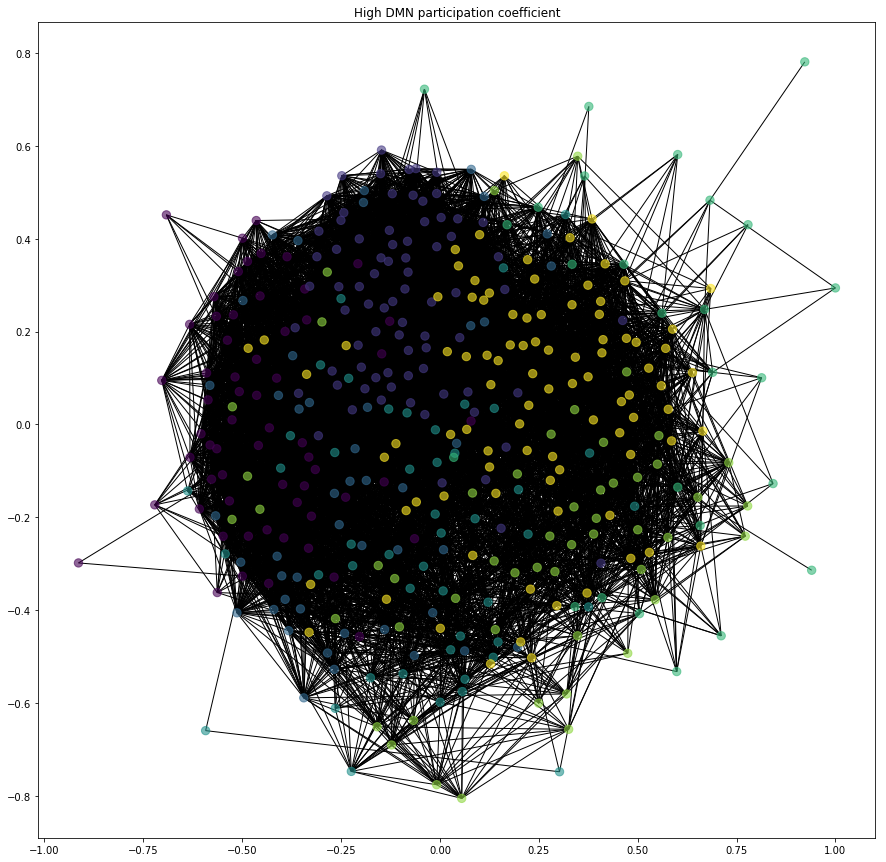

In [185]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

graph_pos = nx.kamada_kawai_layout(G1)
nx.draw_networkx_nodes(G1, graph_pos, node_size=70, node_color=communities, alpha=0.6, k=1,iterations=10)
nx.draw_networkx_edges(G1, graph_pos)
plt.title("High DMN participation coefficient")
plt.show()

neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten.

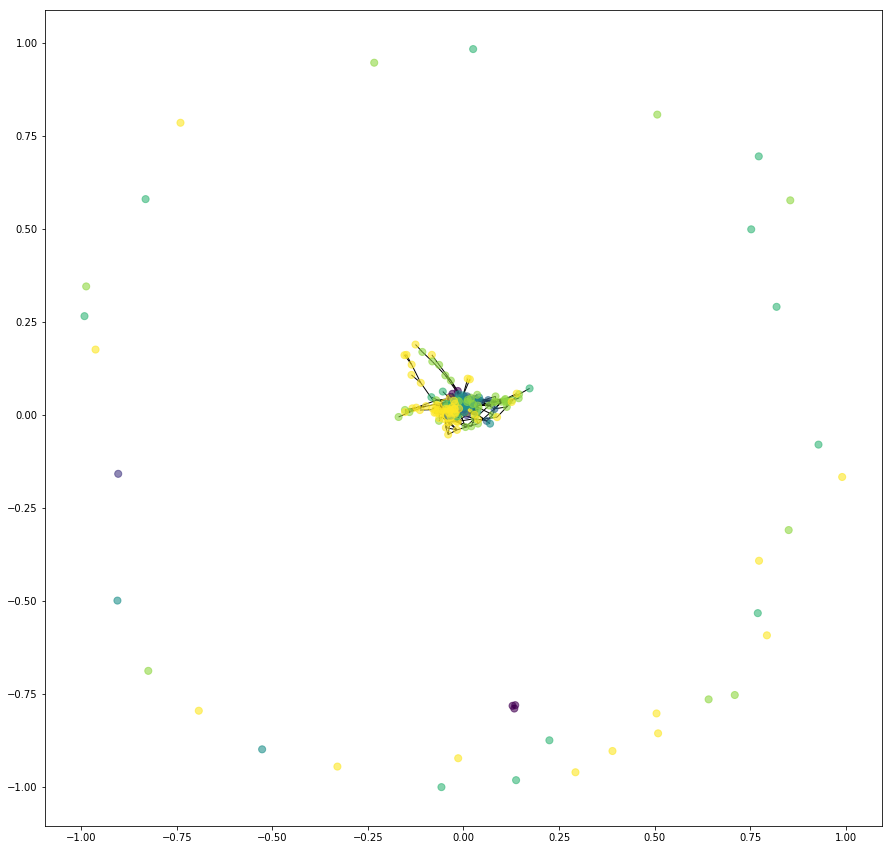

In [180]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

graph_pos = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, graph_pos, node_size=50, node_color=communities, alpha=0.6, k=1,iterations=10)
nx.draw_networkx_edges(G2, graph_pos)

plt.show()

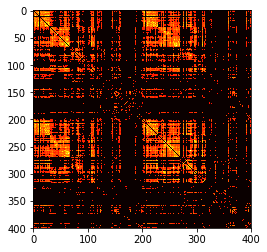

In [124]:
plt.imshow(low_p, cmap='hot')

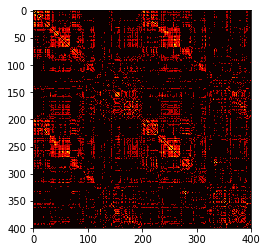

In [130]:
plt.imshow(high_p, cmap='hot')

In [243]:
beh = []
beh = pd.read_csv('~/Box/CogNeuroLab/Aging Decision Making R01/Data/cr_7days.csv')
#beh = pd.read_excel('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Data/demographics_behavioral_data.xlsx')
beh[beh['actbeta'] > 50]
beh = beh.drop(index = 91, axis = 0).reset_index()
beh = beh.drop(columns = 'index')
beh['Group'] = np.where(beh['record_id'] < 40000, 'Young Adults', 'Older Adults')
beh = beh.sort_values('record_id', ascending = True)
beh = beh.set_index('record_id')
beh


,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,rsqact,fact,fnlrgact,Group
record_id,,,,,,,,,,,,,
30003,1.389856,21.815009,14.373034,0.541285,1.236213,6.117306,22.628763,-0.556815,0.687977,0.349941,2793.350530,2074.381187,Young Adults
30004,1.630892,4.438790,15.128163,0.000000,0.815446,6.927406,23.328920,-0.544804,0.683396,0.290998,2129.737297,658.200891,Young Adults
30008,1.610484,7.306045,15.569911,0.139627,0.944868,7.708287,23.431534,-0.468304,0.655135,0.414980,3702.068703,1419.752166,Young Adults
30009,1.951245,7.026165,14.377649,0.081641,1.057264,6.388996,22.366302,-0.497424,0.665721,0.476391,4721.063908,1851.748832,Young Adults
30019,1.580452,8.595108,16.560078,0.100806,0.891032,8.520847,24.599309,-0.508867,0.669936,0.396970,3435.630934,1493.089865,Young Adults
30023,1.307096,7.405614,16.724457,0.027230,0.680778,8.111490,25.337423,-0.631953,0.717747,0.260590,1839.332711,574.337570,Young Adults
30040,1.628069,5.361080,18.601564,0.087981,0.902016,10.825784,26.377343,-0.448330,0.647982,0.363006,2974.169878,736.064939,Young Adults
30057,1.967344,5.520568,15.742333,0.000000,0.983672,7.914873,23.569792,-0.460383,0.652288,0.526638,5806.389964,1115.306870,Young Adults
30064,1.597171,3.130122,14.236165,0.000000,0.798585,6.265021,22.207310,-0.493442,0.664262,0.276064,1990.197492,203.636226,Young Adults


In [241]:
files = []
files = pd.DataFrame(os.listdir(home_dir + '/Box/CogNeuroLab/Aging Decision Making R01/Analysis/rest/xcp'), columns = ['files'])
files['record_id'] = files['files'].str.split('_', expand = True)[0].astype(int)
files = files.set_index('record_id')
files[0:5]

,files
record_id,
30004,30004_schaefer400x7_ts.1D
30008,30008_schaefer400x7_ts.1D
30009,30009_schaefer400x7_ts.1D
30012,30012_schaefer400x7_ts.1D
30015,30015_schaefer400x7_ts.1D


In [244]:
dsn = []
dsn = files.join(beh, sort=True).dropna(subset = ['files'])
dsn[0:5]

,files,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,rsqact,fact,fnlrgact,Group
record_id,,,,,,,,,,,,,,
30004,30004_schaefer400x7_ts.1D,1.630892,4.438790,15.128163,0.000000,0.815446,6.927406,23.328920,-0.544804,0.683396,0.290998,2129.737297,658.200891,Young Adults
30008,30008_schaefer400x7_ts.1D,1.610484,7.306045,15.569911,0.139627,0.944868,7.708287,23.431534,-0.468304,0.655135,0.414980,3702.068703,1419.752166,Young Adults
30009,30009_schaefer400x7_ts.1D,1.951245,7.026165,14.377649,0.081641,1.057264,6.388996,22.366302,-0.497424,0.665721,0.476391,4721.063908,1851.748832,Young Adults
30012,30012_schaefer400x7_ts.1D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30015,30015_schaefer400x7_ts.1D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
dsn.isnull().sum()

files             0
actamp           12
actbeta          12
actphi           12
actmin           12
actmesor         12
actupmesor       12
actdownmesor     12
actalph          12
actwidthratio    12
rsqact           12
fact             12
fnlrgact         12
Group            12
dtype: int64

In [247]:
dsn.shape

(85, 14)

In [262]:
dsn['actamp'].mean()

1.5699712718475096

In [265]:
dsnmat = np.stack([np.ones(dsn['actamp'].size), dsn['actamp'].fillna(dsn['actamp'].mean())], axis = 1)
dsnmat[0:5]

array([[1.        , 1.63089166],
       [1.        , 1.61048398],
       [1.        , 1.95124461],
       [1.        , 1.56997127],
       [1.        , 1.56997127]])

In [266]:
np.savetxt(home_dir + '/Box/CogNeuroLab/Aging Decision Making R01/Analysis/rest/nbs/design_1_amp.txt', dsnmat, fmt = '%f')
